# Homework 2 - Question 1

# 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the dataset


##### Here, we shall load the target values and the attributes separately from different files. First, let us first import and load the target attribute.

In [ ]:
targets = pd.read_excel('/content/Data/aggregateRockData-1.xlsx', header=None)

Let us look into the targets dataframe.

In [ ]:
targets

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,3,28,18,4,1,0,81,57,25,0.012195,0.000000,0.987805,0.695122
536,717,3,29,17,4,2,44,36,40,42,0.024390,0.536585,0.439024,0.487805
537,718,3,29,18,4,25,9,48,27,55,0.304878,0.109756,0.585366,0.329268
538,719,3,30,17,4,16,46,20,23,59,0.195122,0.560976,0.243902,0.280488


Our main target varibale is the 2nd column with column name '1'. So let us extract this by indexing the columns.

In [ ]:
targets = list(targets[1])

In [ ]:
target = pd.DataFrame(targets, columns=['Target'])

In [ ]:
target

,Target
0,1
1,1
2,1
3,1
4,1
...,...
535,3
536,3
537,3
538,3


##### Loading the predictor variables from the provided txt file.

In [ ]:
# Attribute Dataset
attributes=pd.read_csv('/content/Data/norm540.txt', sep='\t', header=None)

##### Our main predictor variables are the ones within the column index 4 and 22.

In [ ]:
attributes = attributes.iloc[:,4:22]

In [ ]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4       540 non-null    float64
 1   5       540 non-null    float64
 2   6       540 non-null    float64
 3   7       540 non-null    float64
 4   8       540 non-null    float64
 5   9       540 non-null    float64
 6   10      540 non-null    float64
 7   11      540 non-null    float64
 8   12      540 non-null    float64
 9   13      540 non-null    float64
 10  14      540 non-null    float64
 11  15      540 non-null    float64
 12  16      540 non-null    float64
 13  17      540 non-null    float64
 14  18      540 non-null    float64
 15  19      540 non-null    float64
 16  20      540 non-null    float64
 17  21      540 non-null    float64
dtypes: float64(18)
memory usage: 76.1 KB


In [ ]:
attributes.describe()

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


In [ ]:
data = pd.concat([target, attributes], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  540 non-null    int64  
 1   4       540 non-null    float64
 2   5       540 non-null    float64
 3   6       540 non-null    float64
 4   7       540 non-null    float64
 5   8       540 non-null    float64
 6   9       540 non-null    float64
 7   10      540 non-null    float64
 8   11      540 non-null    float64
 9   12      540 non-null    float64
 10  13      540 non-null    float64
 11  14      540 non-null    float64
 12  15      540 non-null    float64
 13  16      540 non-null    float64
 14  17      540 non-null    float64
 15  18      540 non-null    float64
 16  19      540 non-null    float64
 17  20      540 non-null    float64
 18  21      540 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 80.3 KB


In [ ]:
# computing number of rows
rows = len(data.axes[0])

# computing number of columns
cols = len(data.axes[1])
print("number of rows: ", rows,"number of columns:", cols)

number of rows:  540 number of columns: 19


In [ ]:
data.select_dtypes(exclude=['object']).columns.tolist()
# This is the list of Numerical values

['Target', 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [ ]:
data.select_dtypes(include=['object']).columns.tolist()
# This is the list of Categorical Attributes

[]

In [ ]:
data['Target'].value_counts()

1    180
2    180
3    180
Name: Target, dtype: int64

<Figure size 2000x2000 with 0 Axes>

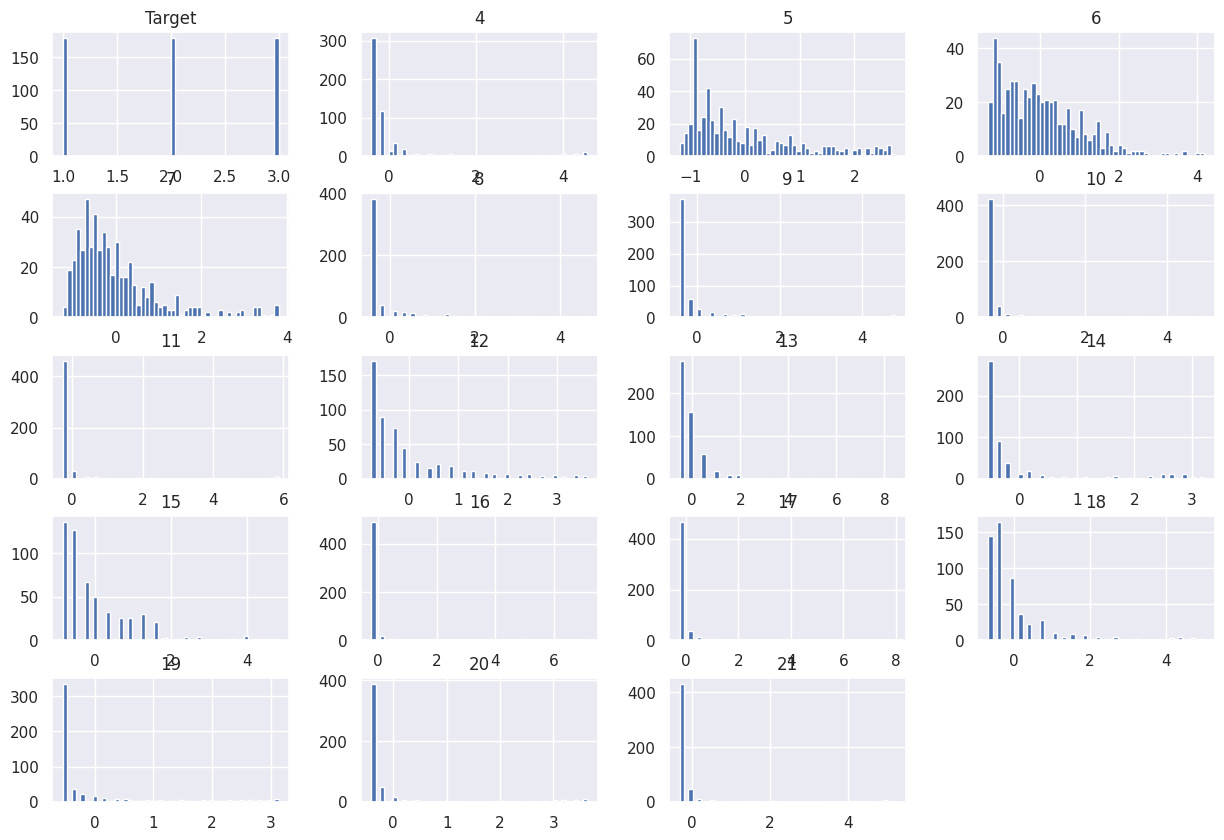

In [ ]:
# histograms to look into the data distributions of each column.
plt.figure(figsize=(20,20))
data.hist(bins=50, figsize=(15,10))
plt.show()

After performing premilinary data analysis, it can be observed that the data has `13 variables(columns)`. The data contains `540 observations(rows).  

The `Target` is the `dependent` variable or the target, the others are independent variables. The 'Target' contains 3 categories

`data.info()` gives us an overall structure of the dataset. it shows that there are no missing values to handle. It also gives us the data type of each attribute. And it is also observed that the data is already in the standardized form so there is no need to perform any further standardization. Therefore, the dataset is ready to use.

Attributes/features with `int or float` as the datatype are `continuous valued`. All our variables are with float datatype (continuous valued).

Attributes/features with `object` as the datatype are `categorical variables`. There are no categorical variables in this dataset.

The Label distributions are in balance which makes the dataset a balanced dataset.

# 2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

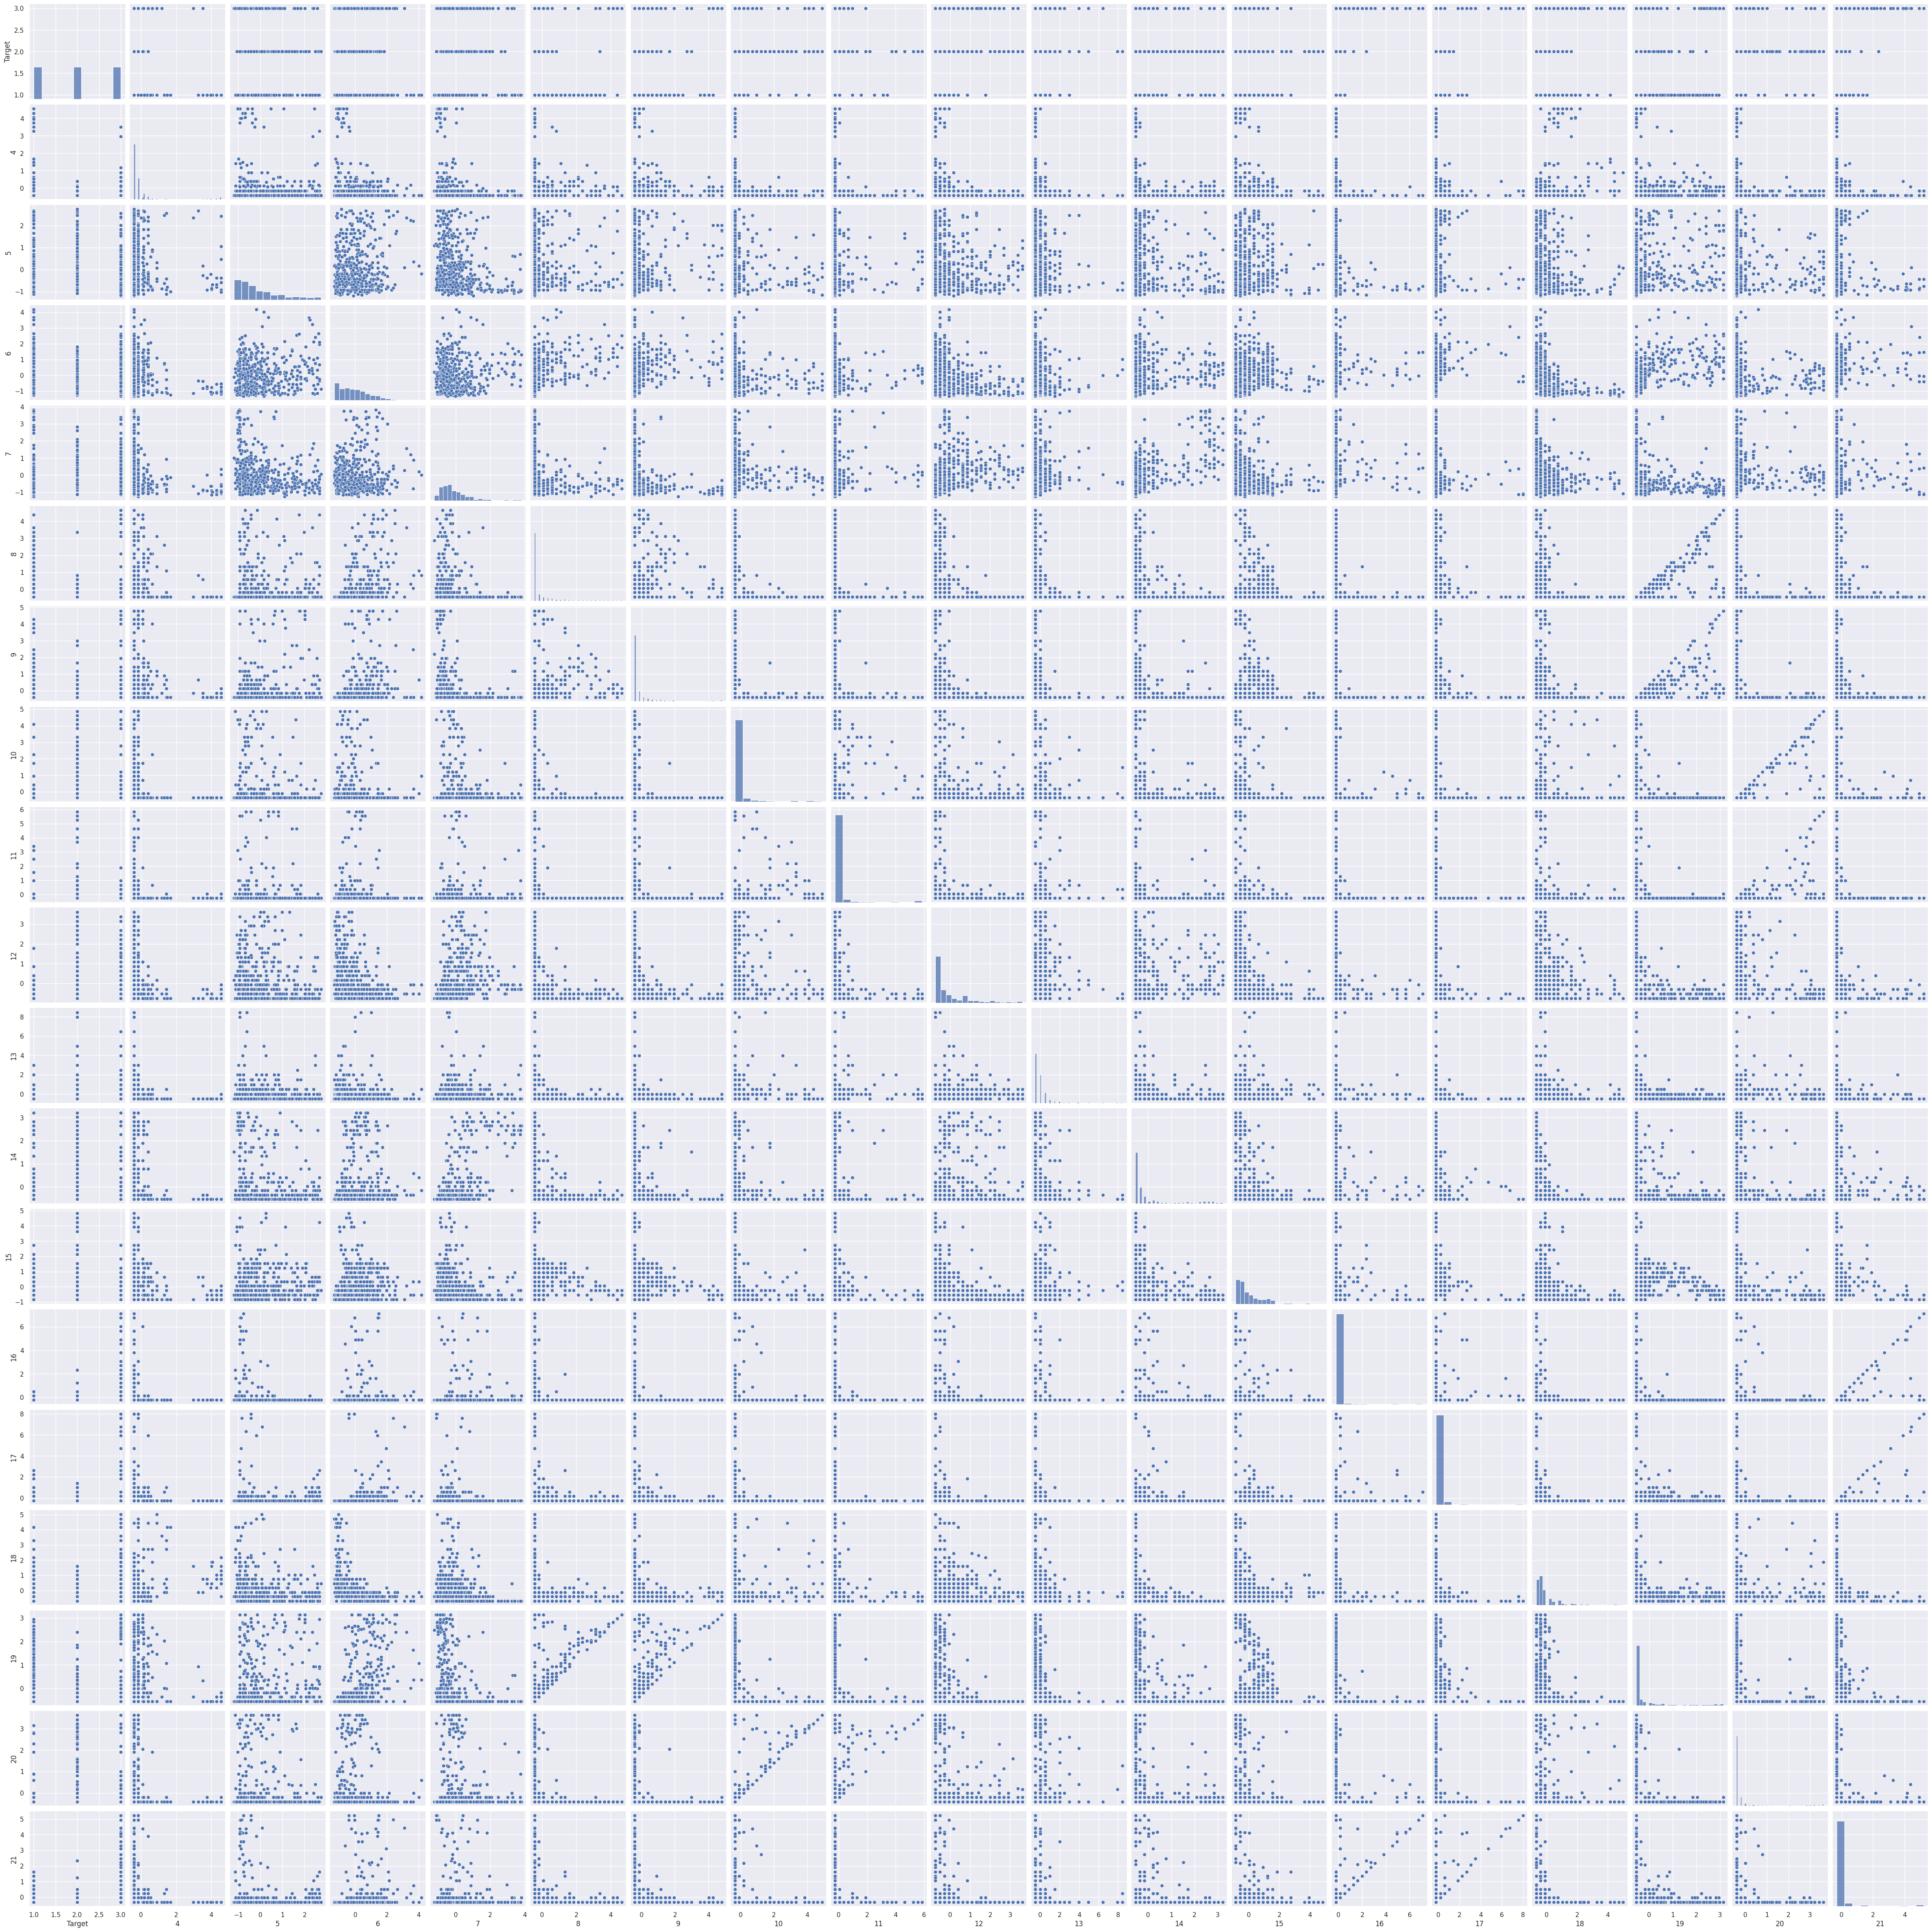

In [ ]:
# plotting the pariplots to view the correlation between the variables.
sns.pairplot(data)

In [ ]:
corr_matrix = data.corr()
corr_matrix['Target'].sort_values(ascending=False)

Target    1.000000
12        0.262855
21        0.258386
16        0.253550
18        0.132240
13        0.130094
17        0.121163
7         0.103781
10        0.086923
20        0.061825
9         0.009450
14        0.007679
11       -0.016680
19       -0.068022
5        -0.104748
8        -0.123388
6        -0.164925
15       -0.242921
4        -0.301462
Name: Target, dtype: float64

In [ ]:
# data = data.drop(columns=[10, 20, 9, 14, 11, 19])

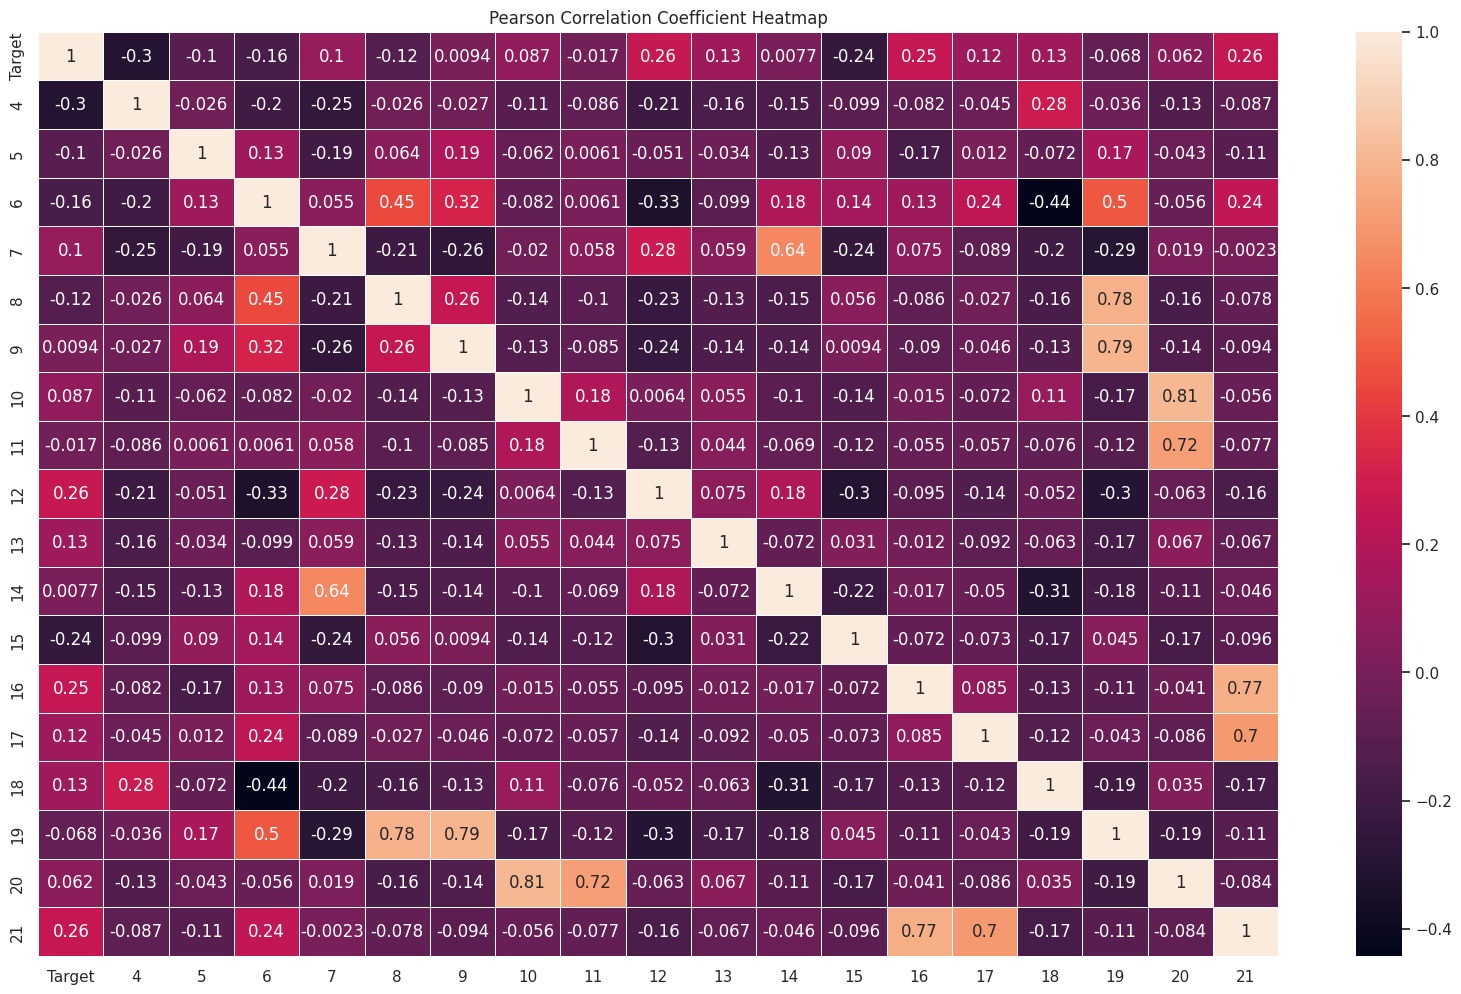

In [ ]:
# Plotting the PCC table using a heatmap.

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  540 non-null    int64  
 1   4       540 non-null    float64
 2   5       540 non-null    float64
 3   6       540 non-null    float64
 4   7       540 non-null    float64
 5   8       540 non-null    float64
 6   9       540 non-null    float64
 7   10      540 non-null    float64
 8   11      540 non-null    float64
 9   12      540 non-null    float64
 10  13      540 non-null    float64
 11  14      540 non-null    float64
 12  15      540 non-null    float64
 13  16      540 non-null    float64
 14  17      540 non-null    float64
 15  18      540 non-null    float64
 16  19      540 non-null    float64
 17  20      540 non-null    float64
 18  21      540 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 80.3 KB


In [ ]:
data.describe()

,Target,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,540.000000,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,2.000000,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,0.817254,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,1.000000,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,1.000000,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,2.000000,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,3.000000,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,3.000000,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


Accodring to the correlation matrix, the features `10`,`20`,`9`,`14`,`11`,`19` are having very low correlation with the target. There is no feature that is strongly correlated to the target.

# 3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.4, random_state=42, stratify=data['Target'])
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42, stratify=test_data['Target'])

In [ ]:
# Checking the shape of the train, test and validations sets to see if they are properly split in the required ratio.
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(324, 19)
(108, 19)
(108, 19)


array([[<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: >]], dtype=object)

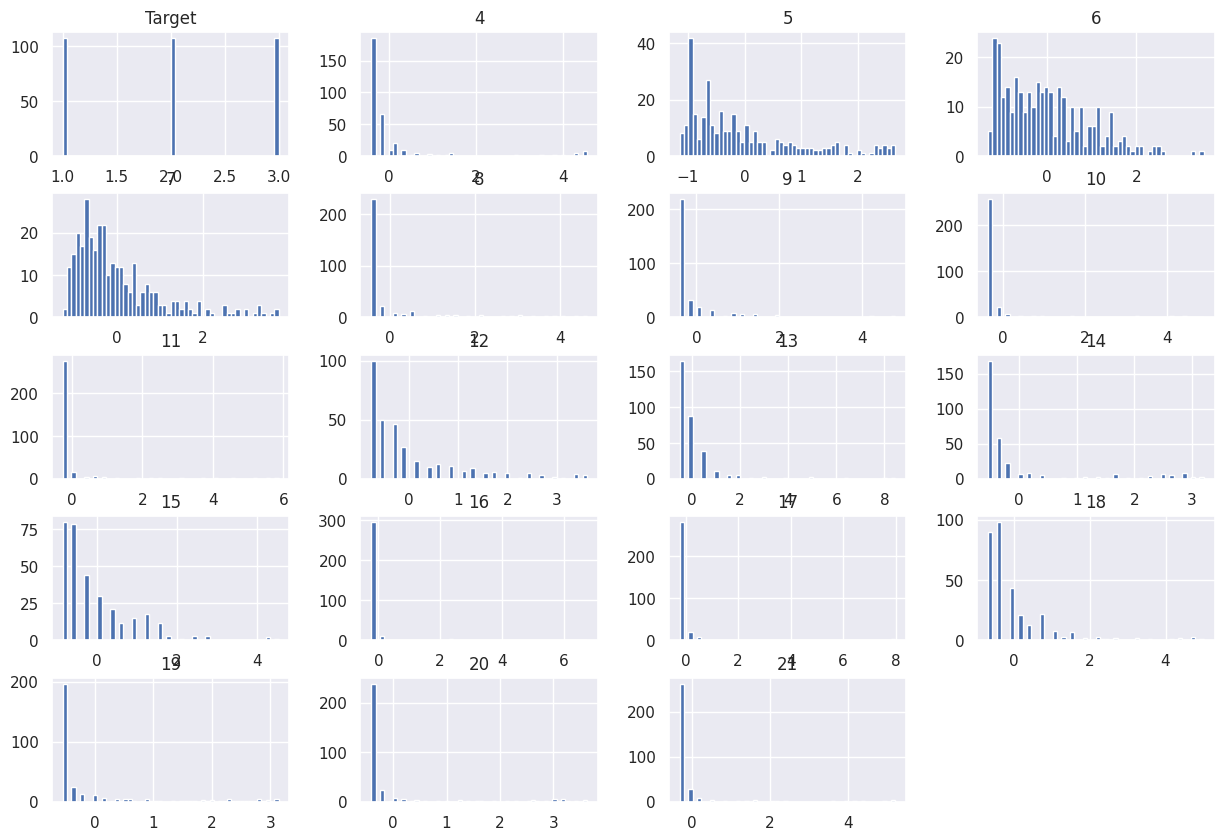

In [ ]:
# checking the data distribution of the train set
train_data.hist(bins=50, figsize=(15,10))

array([[<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: >]], dtype=object)

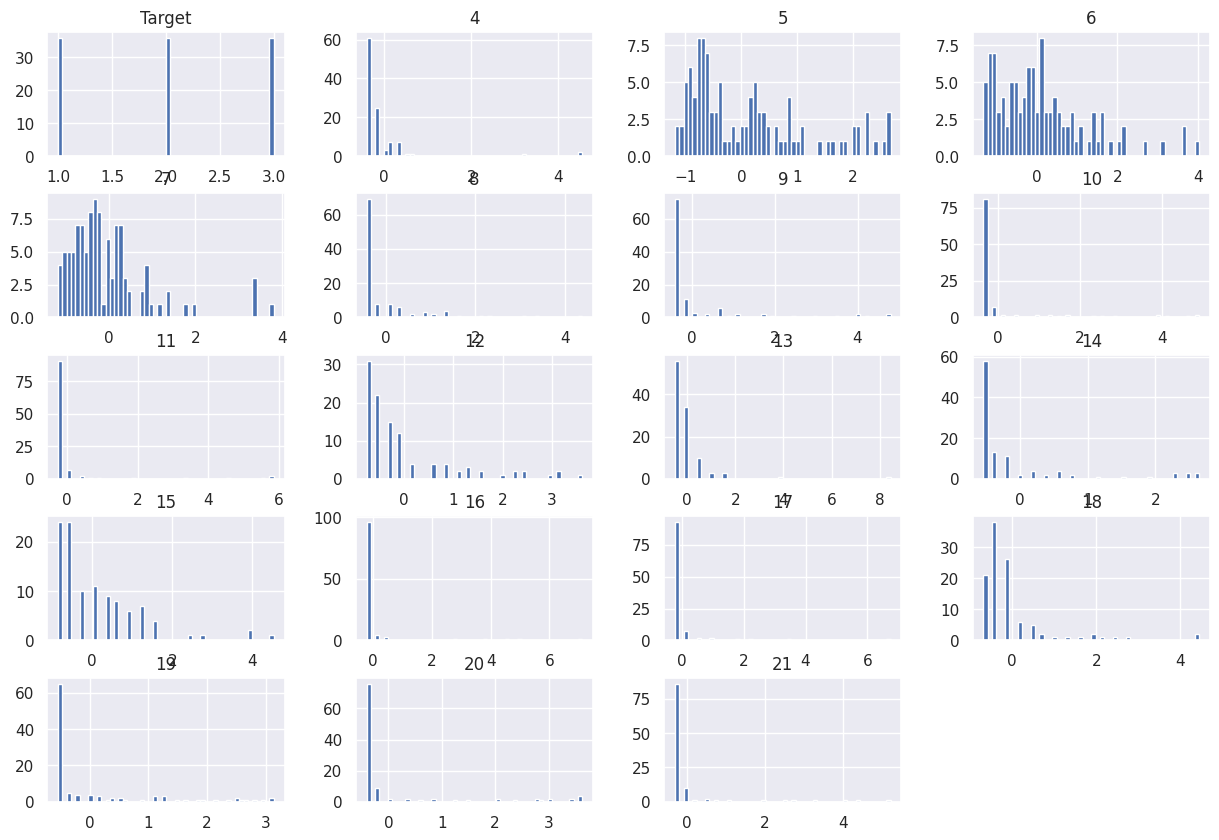

In [ ]:
# checking the data distribution of the test set
test_data.hist(bins=50, figsize=(15,10))

array([[<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: >]], dtype=object)

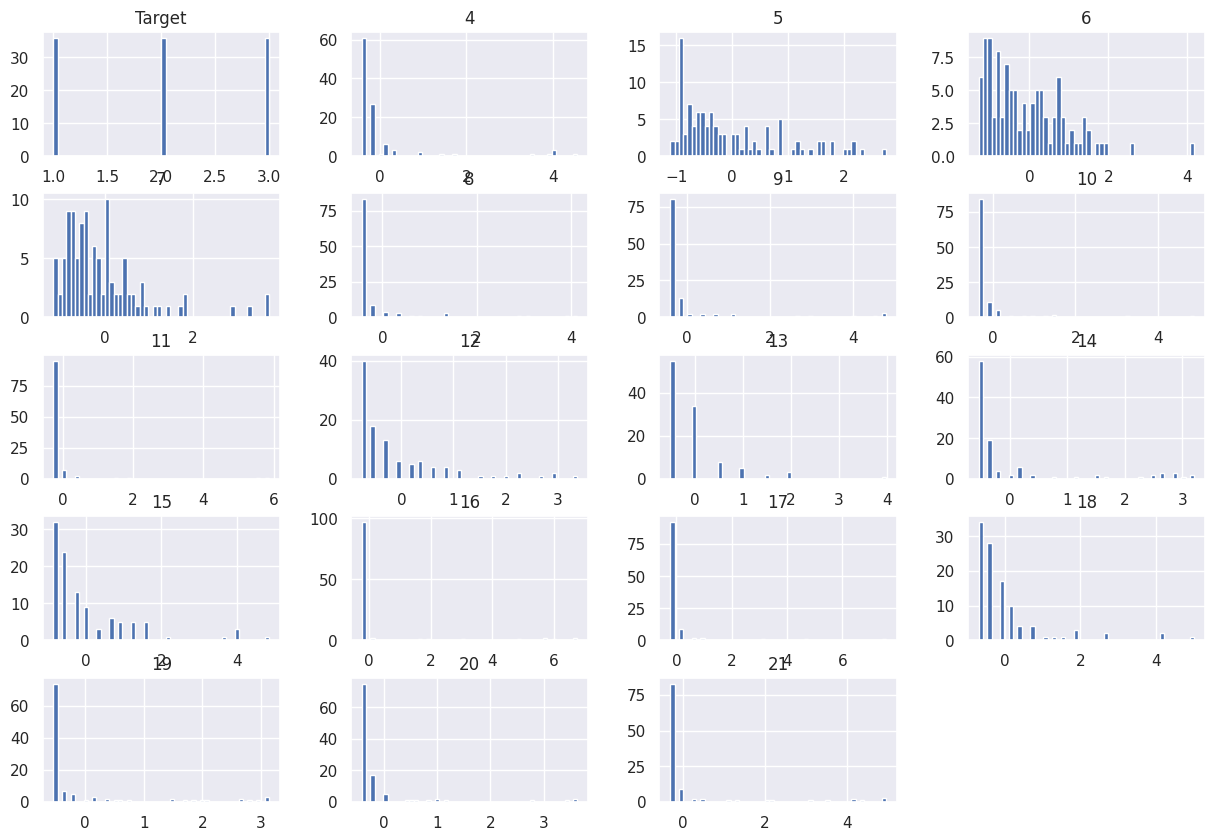

In [ ]:
# checking the data distribution of the validation set
val_data.hist(bins=50, figsize=(15,10))

In [ ]:
train_data.describe()

,Target,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,324.00000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.00000,0.029324,-0.019966,-0.009871,0.032600,0.055500,-0.038222,0.000357,0.008126,0.033353,0.035374,0.007646,-0.043359,-0.073706,0.008110,0.017766,0.006477,0.000481,-0.050521
std,0.81776,1.054094,1.001838,0.955050,1.032656,1.092800,0.876056,1.006824,0.990498,1.019174,1.072735,1.016657,0.918421,0.741280,1.068429,1.019775,0.995378,1.000637,0.909214
min,1.00000,-0.407623,-1.147814,-1.322715,-1.248012,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,1.00000,-0.407623,-0.801641,-0.778727,-0.699145,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,2.00000,-0.407623,-0.375197,-0.182929,-0.300258,-0.436004,-0.405184,-0.352386,-0.260224,-0.299173,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,3.00000,-0.159688,0.552947,0.576929,0.377849,-0.182021,-0.145018,-0.352386,-0.260224,0.390760,-0.013842,-0.165887,0.348718,-0.227922,-0.225045,0.168500,0.010423,-0.207298,-0.310419
max,3.00000,4.551072,2.670119,3.512743,3.749237,4.643652,4.798130,4.888957,5.862693,3.610446,8.457556,3.207009,4.533336,6.752614,7.986072,5.010309,3.137369,3.629722,5.216791


In [ ]:
x_train, y_train = train_data.iloc[:, 1:], train_data['Target']
x_val, y_val = val_data.iloc[:, 1:], val_data['Target']
x_test, y_test = test_data.iloc[:, 1:], test_data['Target']

By examining the results, it becomes evident that the train-test-validation split has been executed accurately, representing the entirety of the dataset. The application of the stratify parameter within the train_test_split function is a commendable approach as it ensures that the data is split while considering the target variable. This method of splitting is particularly useful when dealing with classification tasks and ensures that the distribution of the target variable is preserved across different subsets, leading to more reliable model performance.

# 4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):
Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]
Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]
Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [ ]:
def evaluate_model(model, X, y, set_name):
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Evaluation for {set_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'C': [0.001, 0.1,1.0, 2.0,5.0,10.0],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter' : [100,150, 200, 500]
}

lr = LogisticRegression(multi_class='multinomial', random_state=42)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_lr = LogisticRegression(multi_class='multinomial', random_state=42, **best_params)
best_lr.fit(x_train, y_train)

print(f"Best Parameters for the Logistic Regression :{best_params}")
evaluate_model(best_lr, x_train, y_train, 'Training Set')
evaluate_model(best_lr, x_val, y_val, 'Validation Set')
evaluate_model(best_lr, x_test, y_test, 'Testing Set')

Best Parameters for the Logistic Regression :{'C': 1.0, 'max_iter': 100, 'solver': 'newton-cg'}
Evaluation for Training Set:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75

Evaluation for Validation Set:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67

Evaluation for Testing Set:
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1 Score: 0.69



In [ ]:
best_params

{'C': 1.0, 'solver': 'newton-cg'}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

space = {'kernel': ['poly', 'linear', 'rbf'],
         'degree': [0,1,2,3,4,5,6,7,8],
         'gamma': ['scale', 'auto'],
         'C': [0.001,0.01,0.1,1,10,100]}

explorer = GridSearchCV(SVC(probability=True), space, scoring='accuracy', n_jobs=-1)
explorer.fit(x_train, y_train)

best_params_svc = explorer.best_params_

best_svc = SVC(random_state=42, **best_params_svc)
best_svc.fit(x_train, y_train)


evaluate_model(best_svc, x_train, y_train, 'Training Set')
evaluate_model(best_svc, x_val, y_val, 'Validation Set')
evaluate_model(best_svc, x_test, y_test, 'Testing Set')

Evaluation for Training Set:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82

Evaluation for Validation Set:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72

Evaluation for Testing Set:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74



In [ ]:
best_params_svc

{'C': 10, 'degree': 0, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200], # The number of trees in the forest.
    'max_depth': [None, 10, 20, 30, 40], # The maximum depth of the tree.
    'min_samples_split': [2, 5, 10,20], # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4, 8] # The minimum number of samples required to be at a leaf node.

}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params_rf = grid_search.best_params_

best_rf = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf.fit(x_train, y_train)


evaluate_model(best_rf, x_train, y_train, 'Training Set')
evaluate_model(best_rf, x_val, y_val, 'Validation Set')
evaluate_model(best_rf, x_test, y_test, 'Testing Set')

Evaluation for Training Set:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Evaluation for Validation Set:
Accuracy: 0.71
Precision: 0.72
Recall: 0.71
F1 Score: 0.72

Evaluation for Testing Set:
Accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1 Score: 0.73



In [ ]:
best_params_rf

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

The `LogisticRegression` model is implemented using the GridSearchCV for Hyperparameter Optimization, the best model is having ***accuracy close to 70%***, also the precision and recall at 0.69. The Parameters for this model are `'C': 1.0`, `'solver': 'newton-cg'`.


The `Support Vector Classifier` model is implemented using the GridSearchCV for Hyperparameter Optimization, the best model is having ***accuracy close to 75%***, also the precision and recall at 0.74. The Parameters for this model are `'C': 10, 'degree': 0, 'gamma': 0.01, 'kernel': 'rbf'`. So, this best model is considered for the Ensemble model.

The `Random Forest Classifier` model is implemented using the GridSearchCV for Hyperparameter Optimization, the best model is having ***accuracy close to 73%***, also the precision and recall at 0.74. The Parameters for this model are `'max_depth': 10, 'min_samples_leaf': 2,'min_samples_split': 2 'n_estimators': 200`.

# 5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings

In [ ]:
# Ensemble Model

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('lr', best_lr), ('svm', explorer.best_estimator_), ('rf', best_rf)], voting='soft')
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('svm', SVC(C=1, degree=0, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
from sklearn.metrics import classification_report
y_val_pred = ensemble_model.predict(x_val)

# Calculate the accuracy of the ensemble model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
en_val_cm = confusion_matrix(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy*100:.2f}%')
print(f'Ensemble Model Classification Report For Validation set:\n{val_report}')
print(f'Ensemble Model Confusion Matrix For Validation set:\n{en_val_cm}')

Validation Accuracy: 71.30%
Ensemble Model Classification Report For Validation set:
              precision    recall  f1-score   support

           1       0.76      0.69      0.72        36
           2       0.65      0.72      0.68        36
           3       0.74      0.72      0.73        36

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108

Ensemble Model Confusion Matrix For Validation set:
[[25  6  5]
 [ 6 26  4]
 [ 2  8 26]]


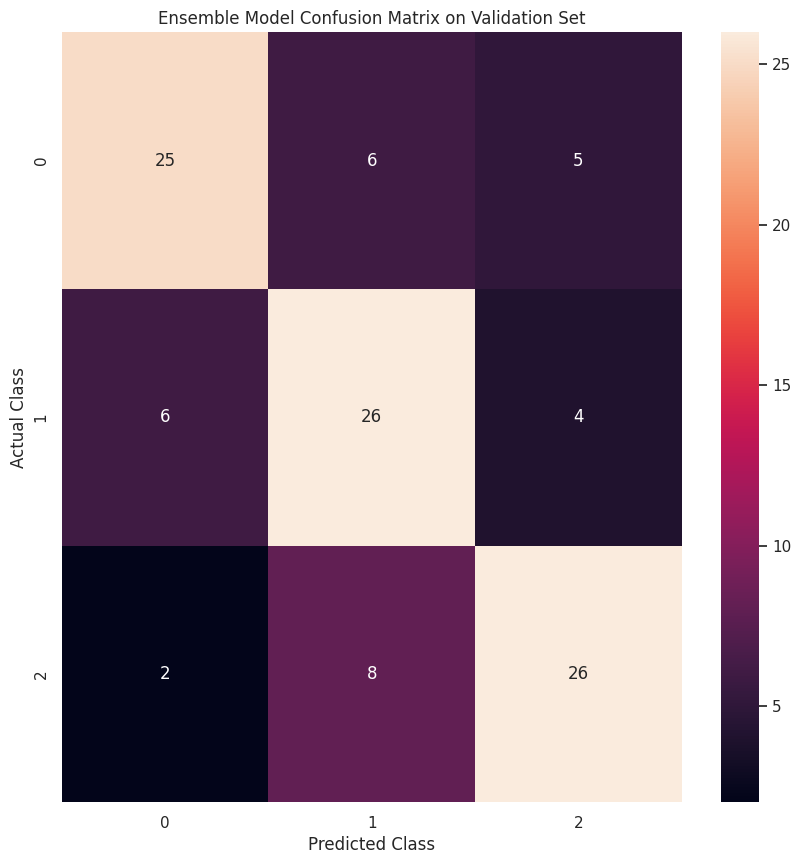

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(en_val_cm, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Ensemble Model Confusion Matrix on Validation Set')
plt.show()

In [ ]:
y_test_pred = ensemble_model.predict(x_test)

# Calculate the accuracy of the ensemble model on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
en_test_cm = confusion_matrix(y_test, y_test_pred)

print(f'Validation Accuracy: {accuracy*100:.2f}%')
print(f'Ensemble Model Classification Report For Validation set:\n{test_report}')
print(f'Ensemble Model Confusion Matrix For Validation set:\n{en_test_cm}')

Validation Accuracy: 73.15%
Ensemble Model Classification Report For Validation set:
              precision    recall  f1-score   support

           1       0.76      0.72      0.74        36
           2       0.70      0.72      0.71        36
           3       0.73      0.75      0.74        36

    accuracy                           0.73       108
   macro avg       0.73      0.73      0.73       108
weighted avg       0.73      0.73      0.73       108

Ensemble Model Confusion Matrix For Validation set:
[[26  4  6]
 [ 6 26  4]
 [ 2  7 27]]


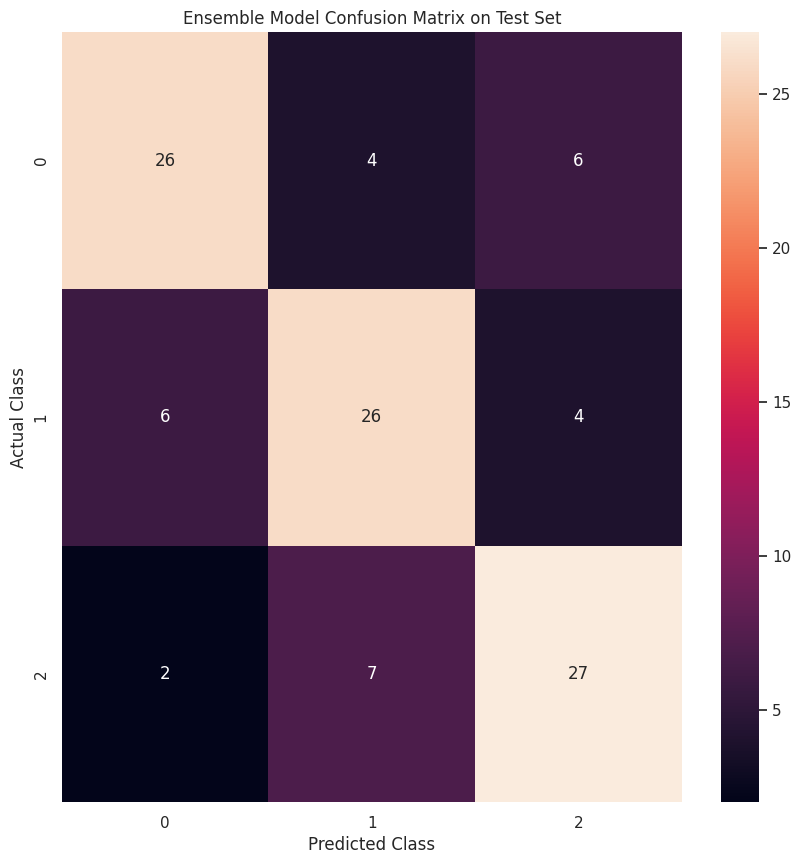

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(en_test_cm, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Ensemble Model Confusion Matrix on Test Set')
plt.show()

The `Ensemble classifier` is declared using the pre trained classifiers which are Logistic Regression, Support Vector Classifier & Random Forest. We are using pre trained classifiers for the ensemble model as these classifiers have already gone through hyper parameter search and optimization processes. Thus, the best fit models are being used for the ensemble model.

This Ensemble model employs a soft voting strategy, averaging the predicted probabilities from multiple constituent models to generate the final prediction. This approach ensures greater stability and reliability by mitigating the impact of outliers and accommodating diverse data patterns, resulting in enhanced generalization performance.

The Ensemble model resulted in ***71 % accuracy for Validation set and 74% for Test Set***. Where as `Logistic Regression` got accuracy of 70% for Validation set and - for test set, `Support Vector Classifier` got accuracy of 75% for Validtion set and - for test set, `Random Forest Classifier` got accuracy of 73% For validation set and - for test set. The Ensemble model beats the accuracy of the previous models.